# Project: AI or not? 🤖
--------------------------------


# 🔴 Importing Libraries

In [1]:
# import modules
# for general data analysis/plotting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# for data prep
from sklearn.model_selection import train_test_split

#for standardscaler
from sklearn.preprocessing import StandardScaler

#for classification report and confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# neural net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# 🔴 Downloading and importing Data
* Raw data was download from this website:
  * https://bitgrit.net/competition/19




In [3]:
!pip install --upgrade gdown


  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [5]:
# https://drive.google.com/file/d/1mdAU_vvGkDZTIcsU8QVUez3RLV4KDuDf/view?usp=sharing
!gdown 1mdAU_vvGkDZTIcsU8QVUez3RLV4KDuDf

Downloading...
From (original): https://drive.google.com/uc?id=1mdAU_vvGkDZTIcsU8QVUez3RLV4KDuDf
From (redirected): https://drive.google.com/uc?id=1mdAU_vvGkDZTIcsU8QVUez3RLV4KDuDf&confirm=t&uuid=97c13d36-7f4a-4268-a842-e9e05c1fde4a
To: /content/ai-text-competition-data.zip
100% 50.8M/50.8M [00:00<00:00, 81.0MB/s]


In [6]:
# unzip it
!unzip ai-text-competition-data.zip

# read it
df = pd.read_csv('/content/ai-text-competition/training_set.csv')

Archive:  ai-text-competition-data.zip
   creating: ai-text-competition/
  inflating: ai-text-competition/solution_format.csv  
  inflating: ai-text-competition/test_set.csv  
  inflating: ai-text-competition/training_set.csv  


## 🟡 Exploring Data

In [7]:
#Checcking the shape of data
print(df.shape)


(11144, 772)


In [8]:
# Checking first few samples of the data
df.head()

,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num,ind
0,1,0.231980,-0.190620,-0.985933,-0.233773,-0.355879,-0.488884,0.254773,-0.121213,-0.820528,...,0.101373,0.575414,-0.567646,-0.051293,0.455840,0.065538,0.020671,25,14,0
1,2,0.168223,-1.204551,-0.596952,-0.722583,0.284799,-0.238639,-0.410948,-0.090654,1.220703,...,0.407270,0.769329,0.555820,0.252843,0.603888,1.240028,-0.076253,23,4,0
2,3,0.522005,-0.759933,-1.209413,0.301834,0.361126,0.158161,-0.117013,0.313158,1.102455,...,0.143658,0.874958,0.679421,0.393198,0.439103,0.742181,-0.430493,29,8,0
3,4,0.038746,-1.408335,-0.580810,0.353450,1.142353,-0.418879,-0.134133,-0.199796,1.071100,...,0.728436,0.540930,1.968447,0.185315,0.630167,0.577032,0.117681,14,3,0
4,5,-0.307572,0.103575,-0.368605,-0.378654,-0.285990,-0.508058,-0.254869,-0.108291,-0.095139,...,-0.146845,0.497731,-0.299924,-0.020024,0.975511,-0.342360,-0.428779,35,9,0


### 🔵 Summary of Dataset

In [9]:
# Quick summary of the dataset
df.describe()

,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num,ind
count,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,...,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000
mean,5572.500000,0.146012,-0.273505,-0.666907,-0.415562,-0.230934,-0.270790,-0.039869,-0.037003,0.101543,...,0.274985,0.687529,0.269849,0.199639,0.443093,0.078578,-0.062243,29.978643,7.347003,0.098708
std,3217.140034,0.389374,0.382566,0.432605,0.745149,0.583487,0.388663,0.292493,0.246509,0.503054,...,0.406760,0.431843,0.545066,0.304694,0.365657,0.551214,0.300848,10.271548,4.041350,0.298283
min,1.000000,-1.633110,-1.971542,-2.505377,-4.280401,-2.413613,-1.514833,-1.427118,-1.036038,-1.779871,...,-1.765492,-1.723701,-1.506003,-1.272904,-1.467510,-1.605773,-1.085949,5.000000,0.000000,0.000000
25%,2786.750000,-0.111816,-0.517288,-0.954874,-0.891329,-0.633606,-0.536751,-0.229016,-0.197038,-0.236033,...,-0.000389,0.392865,-0.125641,0.000539,0.208861,-0.303969,-0.273816,22.000000,4.000000,0.000000
50%,5572.500000,0.161513,-0.261028,-0.673000,-0.415641,-0.244129,-0.281473,-0.036129,-0.038384,0.068244,...,0.256874,0.683075,0.213906,0.205270,0.461389,0.021472,-0.074150,30.000000,7.000000,0.000000
75%,8358.250000,0.418461,-0.016541,-0.381686,0.078408,0.168207,-0.018891,0.157572,0.117311,0.399803,...,0.535327,0.981356,0.634109,0.400167,0.692926,0.405299,0.129446,38.000000,10.000000,0.000000
max,11144.000000,1.378549,1.376324,1.392311,2.184251,1.659698,1.667419,1.070739,1.320982,2.456948,...,1.987709,1.965830,2.582598,1.375909,1.879438,2.579186,1.674109,57.000000,27.000000,1.000000


### 🔵 Distribution of Target Variable

In [10]:
# checking the distribution of target variable
df['ind'].value_counts()

0    10044
1     1100
Name: ind, dtype: int64

--> The number of 1 is almost 10% of the complete dataset. If the future model does not perform well without any sampling technique, this will help us to use any of the sampling techniques.

# 🔴 Cleaning Data

## 🟡 Checking DataType

In [11]:
# Checking the Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11144 entries, 0 to 11143
Columns: 772 entries, ID to ind
dtypes: float64(768), int64(4)
memory usage: 65.6 MB


In [12]:
#Confirming the datatype
df.dtypes

ID               int64
feature_0      float64
feature_1      float64
feature_2      float64
feature_3      float64
                ...   
feature_766    float64
feature_767    float64
word_count       int64
punc_num         int64
ind              int64
Length: 772, dtype: object

--> The data type for all the predictor variable looks good. So not making any conversion for the data types of the varible

## 🟡 Checking for Null Values

In [13]:
#Checking Null values for each column in the dataset
df.isnull().sum()

ID             0
feature_0      0
feature_1      0
feature_2      0
feature_3      0
              ..
feature_766    0
feature_767    0
word_count     0
punc_num       0
ind            0
Length: 772, dtype: int64

In [14]:
#Confirming the total null values in the dataframe
df.isnull().sum().sum()

0

--> There are no null values in the complete dataset. The dat set is clean and does not require any cleaning

# 🔴 Exploratory Data Analysis

## 💛  Plot 1 - HeatMap for Predictor variables with Correlation > 0.15 with Target Variable

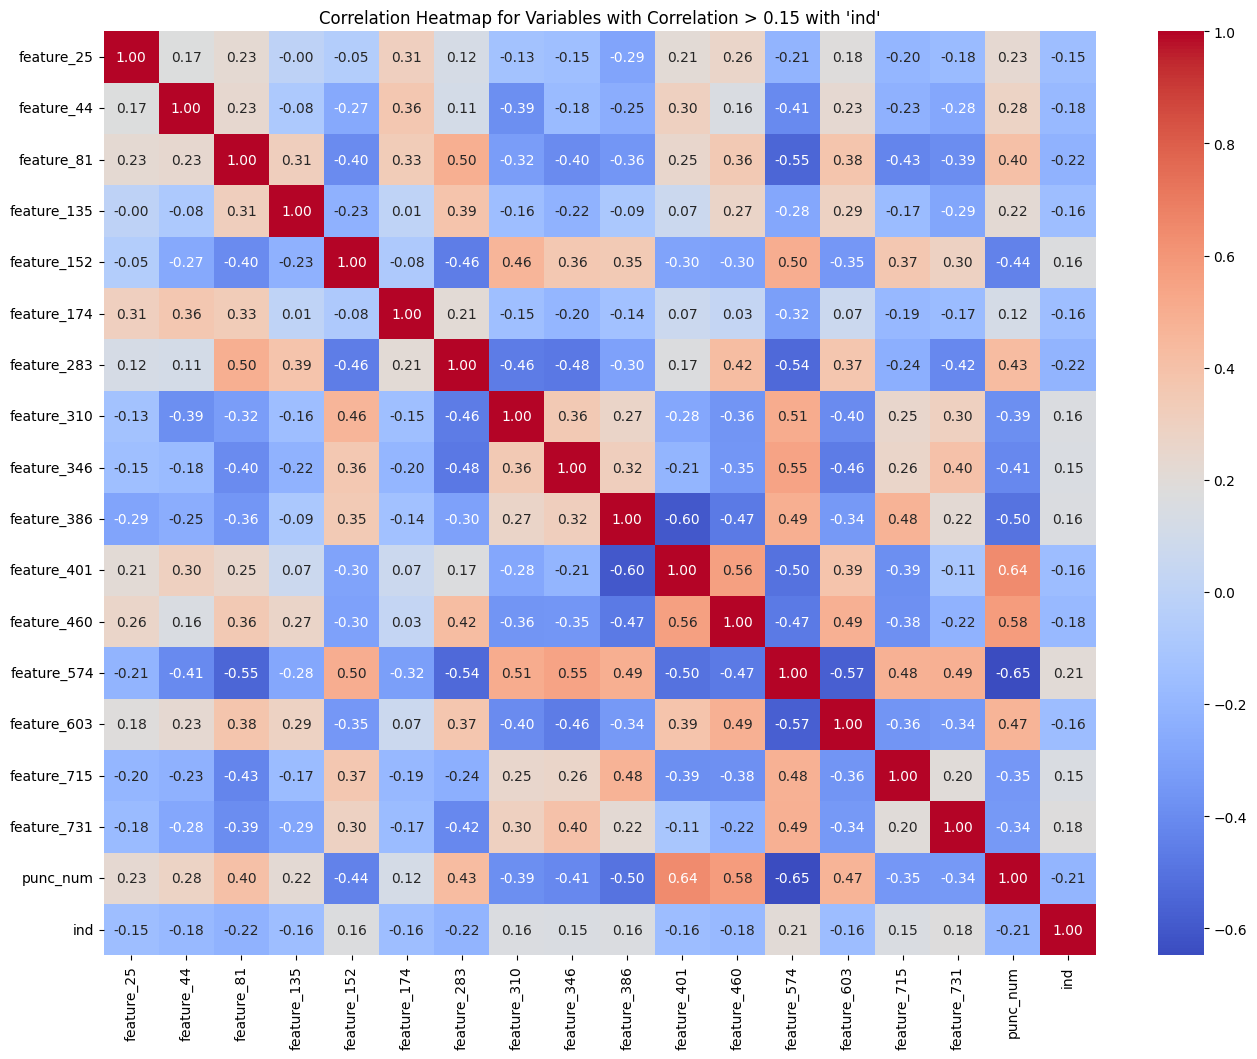

In [15]:
# Calculating the correlation matrix
corr = df.corr()

# Assgning 'ind' to target variable
target_variable = 'ind'

# Filtering variables that have correlation greater than 0.15 (positive or negative) with the target variable
correlated_vars = corr[(corr[target_variable] > 0.15) | (corr[target_variable] < -0.15)].index

# Extracting the correlation matrix for the correlated variables
correlated_matrix = df[correlated_vars].corr()

# size of the plot
plt.figure(figsize=(16, 12))

# Creating a heatmap for the correlated variable
sns.heatmap(correlated_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Displaying the heatmap

plt.title("Correlation Heatmap for Variables with Correlation > 0.15 with 'ind'")
plt.show()



1.  The below figure will give an understanding of the predictor variables having an strong correlation with the Target Variable.
2. 17 predictor variables have a very good correlation with a value greater than 0.15(strongly and negatively correlated)
3. These seventeen variables will be used to make a model in the future to see how the model performs with only seventeen predictor variables while comparing it to a model with all the predictor variables(771) (Ind will be excluded from all the models in future)

## 🧡 Plot 2 - Distribution of word_count & punc_num with ind

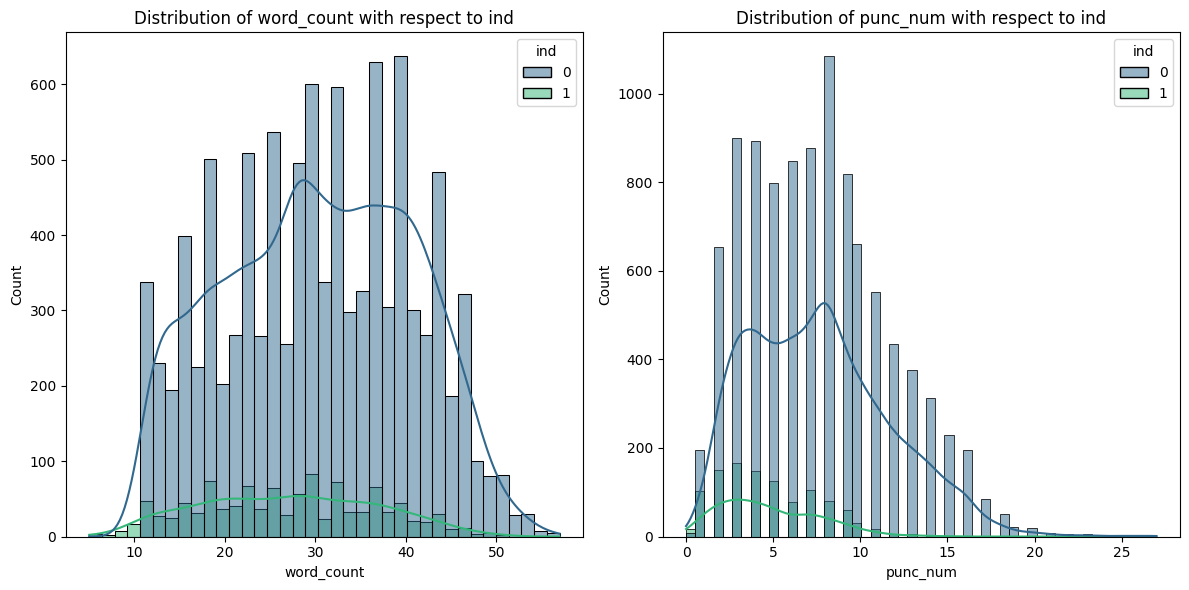

In [16]:
# Selecting the required variables
selected_variables = ['word_count', 'punc_num', 'ind']
selected_df = df[selected_variables]


# size of the figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Creating histogram for 'word_count' with respect to 'ind'
sns.histplot(data=selected_df, x='word_count', hue='ind', kde=True, ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of word_count with respect to ind')

# Creating histogram for 'punc_num' with respect to 'ind'
sns.histplot(data=selected_df, x='punc_num', hue='ind', kde=True, ax=axes[1], palette='viridis')
axes[1].set_title('Distribution of punc_num with respect to ind')

# Adjusting the layout
plt.tight_layout()

# Display the plots
plt.show()


1. As all the predictor variables are document embeddings only word count and punctuation are a little different set of predictors. So checking the skewness of those predictor variables on the target variable.
2. Also punctuations has a very good correlation of -0.21 in the plot1 heatmap, so the distribution of the punctuation will give a good understanding of its relationship with the target variable ind. The heatmap and distribution plot indicates punctaution will be one of the important predictor variable in our models.


## 💜 plot 3 - Distribution of the Target variable

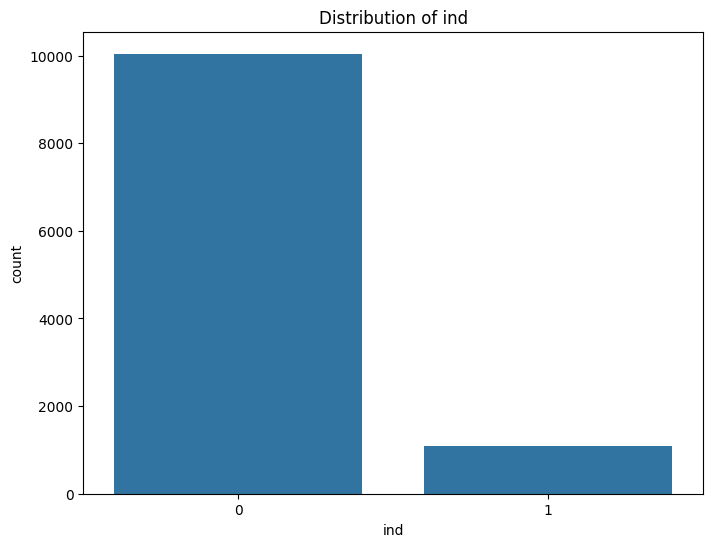

In [17]:
#Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='ind', data=df)
plt.title('Distribution of ind')
plt.show()


The distribution of target variable is a simple plot. But this will give us a visual representation of the target variables and will motivate us to use sampling techniques in the future if any of our models doesnt give good results without sampling.

## 💗 Table-1 showing the relationship between puntuations, wordcount and AI

In [18]:
# Filtering all the AI based on the condition punctuation less than average punctuation and word count is less than the average word count
tmp_df = df[(df['punc_num'] < 7) & (df['word_count'] < 30) & (df['ind'] == 1)]

tmp_df.head()


,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num,ind
7,8,-0.624960,-0.435477,-0.522379,-0.053120,-0.317254,-0.112471,-0.273967,-0.683952,0.132532,...,0.348688,0.062755,0.973341,-0.025976,0.275548,1.068583,0.010488,14,1,1
16,17,0.077158,-0.570118,-0.705506,-0.571611,0.617590,0.022175,0.390946,-0.121072,0.687683,...,-0.090661,0.822914,0.674257,-0.289962,0.076699,0.489542,-0.377378,23,1,1
27,28,0.406011,-0.206171,-0.145640,-0.935956,-0.378325,0.218590,0.139799,-0.361850,-0.356984,...,1.300395,0.759779,0.538289,0.081404,0.327490,0.969756,0.266455,26,1,1
31,32,0.309831,-0.340374,-0.906732,-0.922133,0.140278,-0.253113,0.233457,-0.407649,-0.313792,...,0.500929,0.965819,0.619885,0.789653,0.789480,-0.541472,0.099234,28,5,1
51,52,-0.256521,-0.315273,-0.844355,0.585292,-0.106645,-0.479173,-0.213332,-0.313532,-0.420186,...,0.058329,0.311364,0.919537,0.529552,0.215953,0.289903,0.427552,25,5,1


In [19]:
tmp_df['ind'].value_counts()

1    514
Name: ind, dtype: int64

--> The above table will have a list of all the AI models based on the condition the number of punctuations is less than the average punctuation and the word count is less than the average number of word counts.

--> It is clear that there is a very less number of AI when the punctation and word count is less than the average number.

--> There are only 514 AI models which satisfy the above condition which is a very low number

## 💖 Table 2 - Patterns in Punctuation and word count

In [20]:
# Exploring when punctaions and word count both are even number

tmp_df2 = df[(df['punc_num'] % 2 == 0) & (df['word_count'] % 2 == 0)]
tmp_df2.head()


,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num,ind
5,6,-0.145006,-0.634942,-1.078515,-1.159792,0.311079,-0.295670,0.604143,-0.208568,-0.086018,...,0.415729,1.076430,0.991697,0.335132,0.255469,0.444453,-0.100856,26,6,0
11,12,0.084866,-0.200358,-0.921153,0.081943,-1.337474,0.823542,0.089733,0.367705,-0.835176,...,0.002288,1.181507,0.474934,0.417746,1.114653,0.428622,-0.364575,24,4,0
17,18,0.254442,-0.223781,0.136652,-0.240341,-0.627915,-0.148729,-0.195910,-0.146338,-0.171415,...,0.501537,0.301800,-0.455516,-0.147244,0.127956,-0.331654,0.047817,40,10,0
28,29,-0.266282,-0.658304,-1.098375,-1.484823,-1.346890,0.360357,-0.479375,-0.744995,0.893870,...,0.172659,0.770654,0.033117,0.190894,-0.109144,0.490024,-0.247415,40,4,0
29,30,0.153485,-0.941568,-0.468057,-0.991230,0.759128,0.785092,-0.756444,0.211150,2.201100,...,1.051278,-0.085185,2.110822,-0.091355,-0.545853,1.316181,0.813269,12,2,0


In [21]:
tmp_df2['ind'].value_counts()

0    2589
1     252
Name: ind, dtype: int64

Surprisingly, when both word counts and punctuation counts are even numbers, the dataset exhibits a notable imbalance in favor of human observations. Specifically, there are 2589 instances of humans compared to only 252 instances of AI. The occurrences of AI represent merely 10% of the human observations, highlighting a substantial disparity in the dataset composition.

In [22]:
# Exploring when punctaions and word count both are odd numbers(lets see if we can find any pattern with odd count)
tmp_df3 = df[(df['punc_num'] % 2 != 0) & (df['word_count'] % 2 != 0)]
tmp_df3.head()


,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num,ind
4,5,-0.307572,0.103575,-0.368605,-0.378654,-0.285990,-0.508058,-0.254869,-0.108291,-0.095139,...,-0.146845,0.497731,-0.299924,-0.020024,0.975511,-0.342360,-0.428779,35,9,0
12,13,-0.178200,0.182627,-1.263179,-1.240563,-0.630172,-0.400709,0.203051,-0.211239,-0.277912,...,1.019306,1.018368,-0.054220,0.202756,0.092345,-0.423836,0.056237,27,7,0
13,14,-0.099035,-0.552790,-0.615248,-0.370881,-0.721259,-0.379956,-0.352045,0.215297,0.145428,...,0.074786,0.499477,0.102316,0.301788,0.911072,-0.301996,0.198638,43,11,0
16,17,0.077158,-0.570118,-0.705506,-0.571611,0.617590,0.022175,0.390946,-0.121072,0.687683,...,-0.090661,0.822914,0.674257,-0.289962,0.076699,0.489542,-0.377378,23,1,1
20,21,0.149350,-0.383230,-0.727910,-0.087329,1.105200,-0.386486,-0.047784,-0.203322,0.320500,...,0.595969,0.569622,1.370971,-0.334932,0.498648,0.697241,-0.188623,17,5,0


In [23]:
tmp_df3['ind'].value_counts()

0    2432
1     282
Name: ind, dtype: int64

Remarkably, when both word counts and punctuation counts are odd numbers, a conspicuous imbalance in favor of human observations emerges in the dataset. Notably, there are 2432 instances of humans compared to a mere 282 instances of AI. The occurrences of AI account for only 10% of the human observations, underscoring a substantial asymmetry in the composition of the dataset.


The Pattern found in both using odd and even counts can be used in the future for future enginnering. This was a very interesting observation

## 🔴 Plot 4 - Plot for Punctuation and word count

<ipython-input-24-0cbd2e1c2da7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ind', data=tmp_df4, palette='viridis')


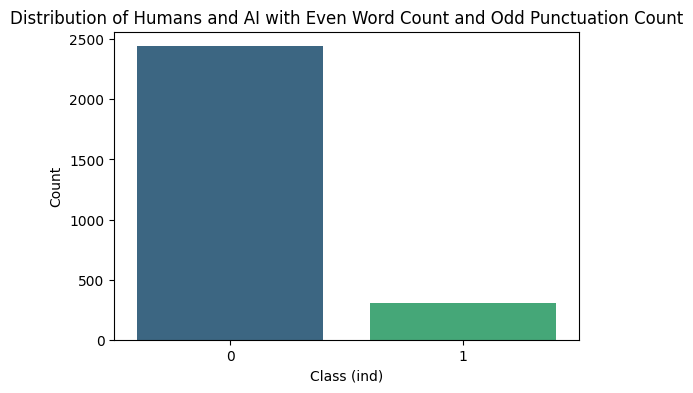

<ipython-input-24-0cbd2e1c2da7>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ind', data=tmp_df5, palette='viridis')


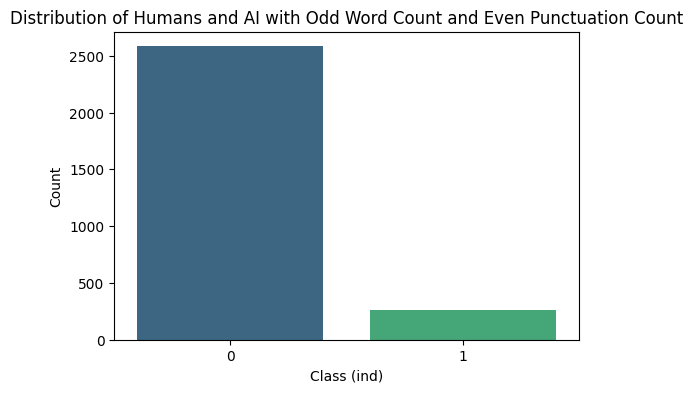

In [24]:
# word count is even and punctuation count is odd
tmp_df4 = df[(df['word_count'] % 2 == 0) & (df['punc_num'] % 2 != 0)]

# word count is odd and punctuation count is even
tmp_df5 = df[(df['word_count'] % 2 != 0) & (df['punc_num'] % 2 == 0)]

# plot1
plt.figure(figsize=(6, 4))
sns.countplot(x='ind', data=tmp_df4, palette='viridis')
plt.title('Distribution of Humans and AI with Even Word Count and Odd Punctuation Count')
plt.xlabel('Class (ind)')
plt.ylabel('Count')
plt.show()

# Plot2
plt.figure(figsize=(6, 4))
sns.countplot(x='ind', data=tmp_df5, palette='viridis')
plt.title('Distribution of Humans and AI with Odd Word Count and Even Punctuation Count')
plt.xlabel('Class (ind)')
plt.ylabel('Count')
plt.show()


Upon examining tables for even and odd punctuation counts, my focus was on discerning the patterns in the distribution of humans and AI based on two specific conditions: even word count and odd punctuation count, and odd word count and even punctuation count. In the former scenario, I observed a distinct pattern where the word count was even, and the punctuation count was odd. Surprisingly, there was a noticeable imbalance, with humans significantly outnumbering AI instances. Conversely, in the latter scenario with odd word count and even punctuation count, a similar discernible pattern emerged. Notably, there was a prevalence of human instances, underscoring a consistent and remarkable asymmetry in the distribution of the dataset.

-> The number of Humans in all the conditions will be definitely higher as they are the majority class here. In all these tables and plots the following condition has given the most interesting result for us:tmp_df = df[(df['punc_num'] < 7) & (df['word_count'] < 30) & (df['ind'] == 1)]

# 🔴 Data Partition & Feature Engineering

In [25]:
# Checking the shape for any data leakage
df.shape

#Everything looks good till now

(11144, 772)

In [26]:
#Dropping ID as we are not going to use it in the Model
#Also dropping ind as it is our target variable

X = df.drop(['ind','ID'], axis=1)
Y = df['ind']

In [27]:
#Reconfirming the shape for X
X.shape

(11144, 770)

In [28]:
#Reconfirming the shape for Y
Y.shape

(11144,)

In [29]:
# Splitting the data on 90% train and 10% test
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.1,
                                                    shuffle = True,
                                                    random_state = 42)

In [30]:
#Checking the shape for X_train, X_test, y_train and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10029, 770) (1115, 770) (10029,) (1115,)


In [31]:
y_test.value_counts()

0    1010
1     105
Name: ind, dtype: int64

In [32]:
y_train.value_counts()

#Everything looks good

0    9034
1     995
Name: ind, dtype: int64

In [33]:
 #Converting to Numpy array
 X_train = np.array(X_train)
 X_test = np.array(X_test)
 y_train = np.array(y_train)
 y_test = np.array(y_test)

In [34]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(10029, 770) (1115, 770) (10029,) (1115,)


## 🔴 Min-Max Scaler

In [35]:
# Creating the StandardScaler instance
scaler = StandardScaler()

# Fiting and transforming the training data (X_train)
X_train = scaler.fit_transform(X_train)

# Transforming the test data (X_test) using the same scaler
X_test = scaler.transform(X_test)

## 🔴 Feature Importance - Feature Engineering

In [36]:
# importing RandomForestClassifier Model

from sklearn.ensemble import RandomForestClassifier #RFC


#Running and Fitting the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

#feature importances
importances = model.feature_importances_

# sorting the features
sorted_indices = np.argsort(importances)[::-1]

#Selecting the top 85% of the features
n_top_features = int(len(sorted_indices) * 0.85)  # Adjust this to change the number of features
top_feature_indices = sorted_indices[:n_top_features]

# # Select the top features from X_train_scaled and X_test_scaled
# # X_train = X_train[:, top_feature_indices]
# # X_test = X_test[:, top_feature_indices]



❌ Despite my attempts to enhance the model through feature engineering, specifically by selecting the top 85% of features based on their importance in a Random Classifier Model, I did not observe significant improvement compared to the current model that utilizes all features. Experimenting with different percentages of features did not yield substantial enhancements either. I also explored Principal Component Analysis (PCA) to extract features with a strong correlation of 0.15, but this approach did not contribute to better performance. Consequently, I opted to proceed without any feature engineering and retained all the features in the final model.

# 🔴 Modelling

## 🟡 Neural Network Model

In [37]:
# Building the Model with dropout of 0.5

#Creating a Sequential Model
model = Sequential()

# Adding first densely connected layer using Relu activation function
model.add(Dense(50, input_shape=(X_train.shape[1],), activation='relu'))

#Adding a dropout layer with dropout rate of 0.5
model.add(Dropout(0.5)) # dropout= 0.5

# Adding second densely connected layer using Relu activation function
model.add(Dense(25, activation='relu'))

#Adding a dropout layer with dropout rate of 0.5
model.add(Dropout(0.5)) # dropout= 0.5

# Adding third densely connected layer using Relu activation function
model.add(Dense(10, activation='relu'))

#Adding a dropout layer with dropout rate of 0.5
model.add(Dropout(0.5)) # dropout= 0.5

#Adding the output layer with sigmoid function
model.add(Dense(1, activation='sigmoid')) # output node = sigmoid

#Displaying the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                38550     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                260       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

## 🟡 Compiling the Model

In [38]:
# compile the model using Adam optimizer and metrics as accuracy
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 🟡 Early Stopping Callback

In [39]:
# Early stopping callback with a Patience of 60
es = EarlyStopping(monitor='val_accuracy',
                   mode='max',
                   patience=60,
                   restore_best_weights = True)

## 🟡 Fitting the Model

In [40]:
# Fitting the model
#epochs=100000

history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=100000,
                    batch_size=30, # 30 this is a hyperparameter
                    shuffle=True,
                    verbose=1)

Epoch 1/100000
335/335 [==============================] - 3s 4ms/step - loss: 0.4684 - accuracy: 0.8578 - val_loss: 0.2644 - val_accuracy: 0.9058
Epoch 2/100000
335/335 [==============================] - 1s 3ms/step - loss: 0.3307 - accuracy: 0.8943 - val_loss: 0.2422 - val_accuracy: 0.9058
Epoch 3/100000
335/335 [==============================] - 1s 3ms/step - loss: 0.2973 - accuracy: 0.8986 - val_loss: 0.2287 - val_accuracy: 0.9049
Epoch 4/100000
335/335 [==============================] - 2s 5ms/step - loss: 0.2732 - accuracy: 0.9034 - val_loss: 0.2121 - val_accuracy: 0.9067
Epoch 5/100000
335/335 [==============================] - 2s 5ms/step - loss: 0.2552 - accuracy: 0.9065 - val_loss: 0.2127 - val_accuracy: 0.9130
Epoch 6/100000
335/335 [==============================] - 1s 3ms/step - loss: 0.2450 - accuracy: 0.9070 - val_loss: 0.2074 - val_accuracy: 0.9193
Epoch 7/100000
335/335 [==============================] - 1s 3ms/step - loss: 0.2363 - accuracy: 0.9107 - val_loss: 0.2056 -

# 🔴 Evaluation

## 🟡 Learning Curves for accuracy and Loss

### 💜 Plot for Training and Validation Accuracy

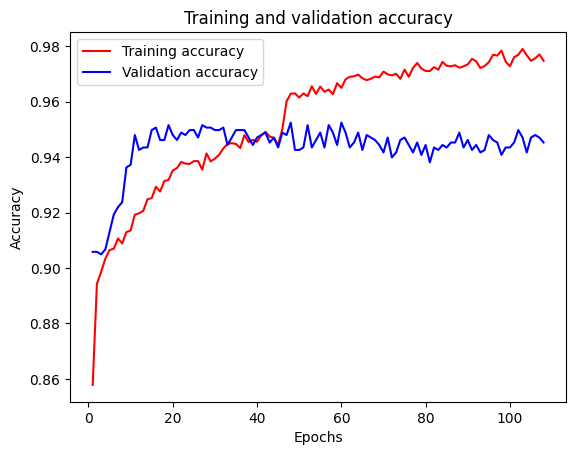

In [41]:
# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 💜 Plot for Training and Validation Loss

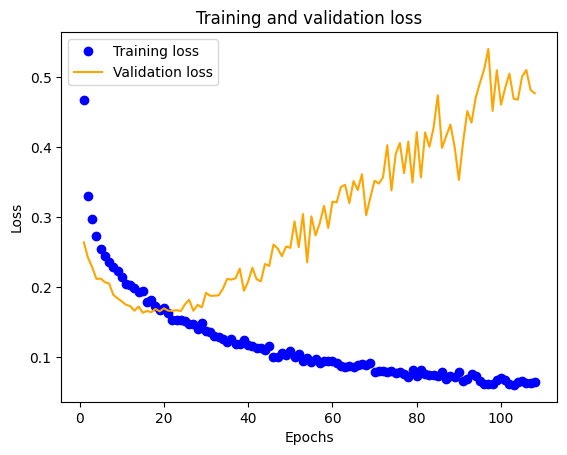

In [42]:
# Training and Validation accuracy by loss


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plot for Training and Validation accuracy by epoch

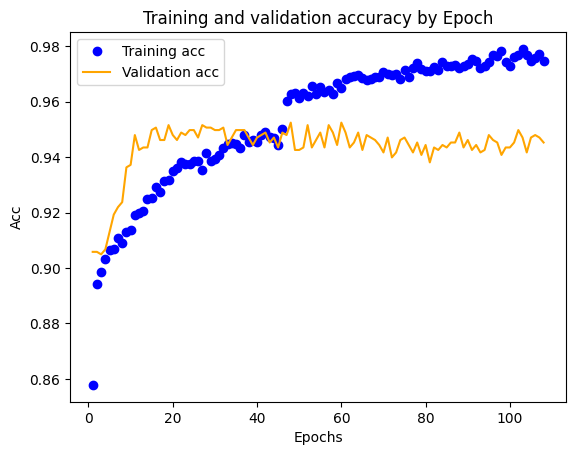

In [43]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['accuracy'] # you can change this
val_loss_values = history_dict['val_accuracy'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training acc')
plt.plot(epochs, val_loss_values, 'orange', label='Validation acc')
plt.title('Training and validation accuracy by Epoch')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

## 💛 Confusion Matrix and Error Metrics

In [44]:
# see how the model did!
preds = model.predict(X)
print(preds.shape)

# i'm spreading that prediction across three nodes and they sum to 1
print(preds[0])

# sum it up! see how probability mass (1) is spread over three preds?
np.sum(preds[0])

349/349 [==============================] - 1s 2ms/step
(11144, 1)
[0.]


0.0

### ✅ Confusion Matrix for Train Partition

In [45]:
# Confusion Matrix for train Partition
# if you don't round to a whole number (0 or 1), the confusion matrix won't work!
preds = np.round(model.predict(X_train),0)

# confusion matrix
confusion_matrix(y_train, preds) # order matters! (actual, predicted)

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

314/314 [==============================] - 1s 2ms/step


array([[9016,   18],
       [ 163,  832]])

Train Partition Results :


     TP - 899

     TN - 9032

     FP - 2

     FN - 96

### ✅ Error Metrics for Train Partition

In [46]:
# Error Metrics for train partition
print(classification_report(y_train, preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9034
           1       0.98      0.84      0.90       995

    accuracy                           0.98     10029
   macro avg       0.98      0.92      0.95     10029
weighted avg       0.98      0.98      0.98     10029




Train Partition - The model achieved 99% precision and  recall for both Class 0 and Class 1, with a 99% F1-score for Class 0 and 95% for Class 1, demonstrating robust classification performance. Class 0, with 100% recall, correctly predicted all Human instances, while Class 1(AI), with 91% recall, showed high accuracy in predicting positive instances. The overall accuracy reached 99%, and macro and weighted averages of precision, recall, and F1-score indicated consistent performance across both classes, accounting for class imbalance.

### ✅ Confusion Matrix for Test Partition

In [47]:
#Confusion Matrix for test Partition
preds = np.round(model.predict(X_test),0)

# confusion matrix
confusion_matrix(y_test, preds) # order matters! (actual, predicted)

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

35/35 [==============================] - 0s 2ms/step


array([[999,  11],
       [ 42,  63]])

Test Partition Results :


     TP - 65

     TN - 1004

     FP - 6

     FN - 40

### ✅ Error Metrics for Test Partition

In [48]:
#Error Metrics for test Partition

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1010
           1       0.85      0.60      0.70       105

    accuracy                           0.95      1115
   macro avg       0.91      0.79      0.84      1115
weighted avg       0.95      0.95      0.95      1115



 Test Partition - The model achieved 96% precision and 99% recall for Human (Class 0), indicating high accuracy in predicting Human instances, while for AI(class-1), it showed 92% precision and 62% recall, resulting in a 74% F1-score. The overall accuracy on the test partition was 96%, with a macro average of 94% for precision and 81% for recall, and a weighted average of 96% for precision, 96% for recall, and 96% for F1-score, demonstrating consistent performance across both classes, albeit with lower recall for Class 1.

# 😍  Final F1 Score

In [49]:
from sklearn.metrics import f1_score

In [50]:
f1_score(y_test, preds)

0.7039106145251396

# 🔶 Conclusion

1. At the project's initiation, I conducted an initial model run by exclusively choosing predictors with a significant correlation (greater than 0.15, either positive or negative) with the target variable. However, employing a dense layer neural network revealed an F1 score of approximately 0.6 with that model. This initial F1 score prompted the realization that retaining a substantial number of predictor variables in the dataset might be crucial, leading me to reconsider the strategy of dropping a large number of predictors.

2. In my subsequent trial, I explored feature engineering by selecting the top 85% (and various other percentages) of features based on their importance in a Random Classifier Model. However, despite these efforts, the model's performance did not show a significant improvement, maintaining an F1 score ranging between 0.6 and 0.68. Consequently, I opted not to proceed with a model that incorporated feature engineering.

3. Subsequently, I developed a model while retaining all features, comprising three densely connected layers with 50, 25, and 10 neurons, each utilizing ReLU activation functions. After each dense layer, a dropout layer with a dropout rate of 0.5 was incorporated. The output layer employed a sigmoid activation function with one output node. Notably, the model incorporated an early stopping callback with a patience of 60. Ultimately, this model achieved an F1 score of 0.7386 on the test partition.

4. The model demonstrates robust performance in accurately identifying instances of the majority class (Human, Class 0), as evidenced by a high true negative count (1004) and a low false positive count (6). While facing challenges in predicting instances of the minority class (AI, Class 1), reflected in a lower true positive count (65) and a slightly higher false negative count (40), this suggests the model's cautious approach, aiming to minimize false positives, and aligns with the chosen dropout rate's regularization effect during training.

5. An Area Under the Curve (AUC) value of 0.94 in the Receiver Operating Characteristic (ROC) curve indicates strong discriminative power of the model. The closer the AUC is to 1, the better the model distinguishes between positive and negative instances. In this case, the high AUC of 0.94 suggests that the model performs exceptionally well in differentiating between the two classes, affirming its robust predictive capability. (AUC curve is plotted below)

6. Final conclsuion : In the project's early stages, an attempt to select predictors based on correlation yielded a neural network with a modest F1 score of 0.6, prompting reconsideration of feature reduction. Subsequent efforts in feature engineering, despite not significantly improving model performance, informed the decision to retain all features. The final model, a three-layer dense neural network, exhibited robust performance with an F1 score of 0.7386 on the test partition and a strong AUC of 0.94 in the ROC curve, emphasizing its effectiveness in distinguishing between classes. Overall, this model is doing a good job in classifying Human and AI.

35/35 [==============================] - 0s 2ms/step


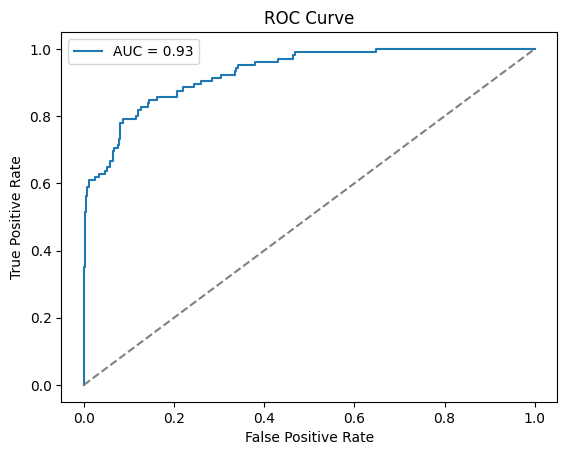

In [51]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming 'model' is your trained neural network
y_probs = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

